## Model Selection

In this notebook, we will find the model that returns the best results

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
booksfinal = pd.read_csv('booksfinal.csv').iloc[:,1:]
booksfinal.head()

,book_title,author,num_pages,genres,average_rating,Academic,Academic > College,Academic > Read For School,Academic > School,Action,...,Writing > Books About Books,Writing > Essays,Writing > Journalism,Young Adult,Young Adult > Coming Of Age,Young Adult > High School,Young Adult > Teen,Young Adult > Young Adult Contemporary,Young Adult > Young Adult Fantasy,Young Adult > Young Adult Romance
0,Harry Potter and the Half-Blood Prince,J.K. Rowling,652,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",4.57,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Clockwork Prince,Cassandra Clare,498,"['Fantasy', 'Young Adult', 'Romance', 'Fantasy...",4.42,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"The Lion, the Witch and the Wardrobe",C.S. Lewis,206,"['Fantasy', 'Classics', 'Fiction', 'Young Adul...",4.22,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,The Reader,Bernhard Schlink,216,"['Fiction', 'Historical > Historical Fiction',...",3.77,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Gabriel's Inferno,Sylvain Reynard,506,"['Romance', 'Romance > Contemporary Romance', ...",4.00,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
from sklearn.model_selection import train_test_split

X = booksfinal.drop(['average_rating','book_title','author','genres','num_pages'],axis=1)
y = booksfinal['average_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
from sklearn.neighbors import KNeighborsRegressor

In [139]:
knr = KNeighborsRegressor()

In [140]:
knr.fit(X_train,y_train)

KNeighborsRegressor()

In [141]:
y_train.shape

(800,)

In [142]:
y_test.shape

(200,)

In [143]:
pred = knr.predict(X_test)

In [144]:
from sklearn.metrics import accuracy_score
knr.score(X_test,y_test)

0.24574654441410582

In [145]:
from sklearn.ensemble import RandomForestRegressor

In [146]:
rfr = RandomForestRegressor(n_estimators=100)

In [147]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [148]:
pred = rfr.predict(X_test)

In [149]:
rfr.score(X_test,y_test)

0.3789422088496093

In [152]:
x = 1
pred[x], y_test.iloc[x]

(3.8095999999999997, 3.46)

In [153]:
model = RandomForestRegressor()

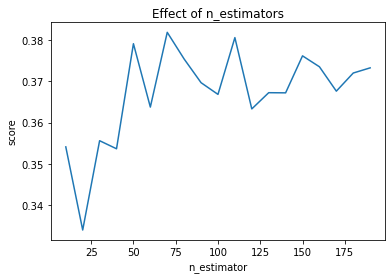

In [154]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [155]:
estimators[9]

100

In [156]:
np.array(scores).argmax()

6

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [159]:
lr.score(X_test,y_test)

-4.5849221648062446e+24

In [160]:
from sklearn.cluster import KMeans

In [161]:
km = KMeans()

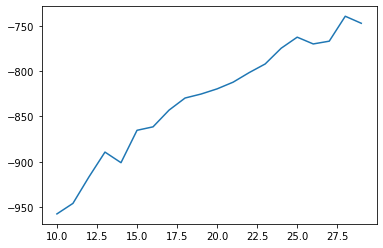

In [180]:
kmscores = []
clustercount = np.arange(10,30)
for i in clustercount:
    km.set_params(n_clusters=i)
    km.fit(X,y)
    kmscores.append(km.score(X_test,y_test))

plt.plot(clustercount,kmscores)

In [184]:
km.set_params(n_clusters=25)
km.fit(X,y)
km.score(X,y)

-3824.8991096834334

In [186]:
set(km.labels_)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24}

In [187]:
books1 = books[['book_title','author','genres']]
books1

,book_title,author,genres
0,Harry Potter and the Half-Blood Prince,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy..."
1,Clockwork Prince,Cassandra Clare,"['Fantasy', 'Young Adult', 'Romance', 'Fantasy..."
2,"The Lion, the Witch and the Wardrobe",C.S. Lewis,"['Fantasy', 'Classics', 'Fiction', 'Young Adul..."
3,The Reader,Bernhard Schlink,"['Fiction', 'Historical > Historical Fiction',..."
4,Gabriel's Inferno,Sylvain Reynard,"['Romance', 'Romance > Contemporary Romance', ..."
...,...,...,...
995,Winnie-the-Pooh,A.A. Milne,"['Classics', 'Childrens', 'Fiction', 'Fantasy'..."
996,The Yellow Wallpaper and Other Stories,Charlotte Perkins Gilman,"['Classics', 'Short Stories', 'Fiction', 'Femi..."
997,Looking for Alaska,John Green,"['Young Adult', 'Fiction', 'Contemporary', 'Ro..."
998,Ready Player One,Ernest Cline,"['Science Fiction > Dystopia', 'Contemporary',..."


In [188]:
booklabel = pd.concat([booksfinal,pd.DataFrame(km.labels_)],axis=1)
booklabel.columns = list(booksfinal.columns) + ['Label']

In [189]:
booklabel1 = booklabel[~booklabel['Label'].isnull()].sort_values('Label')[['book_title','author','genres','Label']]

In [190]:
booklabel1.shape

(1000, 4)

In [191]:
booklabel1.head()

,book_title,author,genres,Label
683,Number the Stars,Lois Lowry,"['Historical > Historical Fiction', 'Young Adu...",0
382,A Monster Calls,Patrick Ness,"['Fantasy', 'Young Adult', 'Fiction', 'Horror'...",0
530,Because of Winn-Dixie,Kate DiCamillo,"['Fiction', 'Childrens', 'Realistic Fiction', ...",0
708,Hatchet,Gary Paulsen,"['Young Adult', 'Fiction', 'Adventure', 'Class...",0
540,The Giver,Lois Lowry,"['Young Adult', 'Fiction', 'Classics', 'Scienc...",0


In [192]:
booklabel['Label'].value_counts()

4     86
12    60
19    55
10    53
3     45
1     45
16    45
8     44
11    44
18    43
5     42
15    41
6     39
14    37
13    36
21    35
22    34
17    33
24    32
0     32
7     28
9     28
2     26
20    19
23    18
Name: Label, dtype: int64

In [198]:
booklabel1[booklabel1['book_title'].str.contains('harry potter',case=False)]

,book_title,author,genres,Label
943,Harry Potter Series Box Set,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Childre...",19
0,Harry Potter and the Half-Blood Prince,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",19
443,Harry Potter and the Sorcerer's Stone,J.K. Rowling,"['Fantasy', 'Fiction', 'Young Adult', 'Fantasy...",19
301,Harry Potter and the Order of the Phoenix,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",19
137,Harry Potter and the Deathly Hallows,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",19
191,Harry Potter and the Chamber of Secrets,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",19
785,Harry Potter and the Goblet of Fire,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",19
707,Harry Potter and the Prisoner of Azkaban,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Fantasy...",19


In [196]:
booklabel1[booklabel1['Label'] == 19]

,book_title,author,genres,Label
915,The Bad Beginning,Lemony Snicket,"['Fiction', 'Young Adult', 'Childrens', 'Fanta...",19
837,James and the Giant Peach,Roald Dahl,"['Childrens', 'Fantasy', 'Fiction', 'Classics'...",19
936,The Last Battle,C.S. Lewis,"['Fantasy', 'Fiction', 'Classics', 'Young Adul...",19
995,Winnie-the-Pooh,A.A. Milne,"['Classics', 'Childrens', 'Fiction', 'Fantasy'...",19
829,The Magician's Nephew,C.S. Lewis,"['Fantasy', 'Classics', 'Fiction', 'Young Adul...",19
924,Redwall,Brian Jacques,"['Fantasy', 'Fiction', 'Young Adult', 'Childre...",19
888,Watership Down,Richard Adams,"['Classics', 'Fiction', 'Fantasy', 'Young Adul...",19
889,Inheritance,Christopher Paolini,"['Fiction', 'Young Adult', 'Adventure', 'Fanta...",19
943,Harry Potter Series Box Set,J.K. Rowling,"['Fantasy', 'Young Adult', 'Fiction', 'Childre...",19
934,The Horse and His Boy,C.S. Lewis,"['Fantasy', 'Classics', 'Fiction', 'Young Adul...",19


In [177]:
booklabel['Label']

0       5.0
1      17.0
2      10.0
3      15.0
4       0.0
       ... 
995     NaN
996     NaN
997     NaN
998     NaN
999     NaN
Name: Label, Length: 1000, dtype: float64

In [ ]:
for label in set

In [173]:
from sklearn.cluster import DBSCAN

In [174]:
db = DBSCAN(eps=0.7,min_samples=3)

In [175]:
db.fit(X,y)

DBSCAN(eps=0.7, min_samples=3)

In [176]:
set(db.labels_)

{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24}

In [ ]:
db.

In [199]:
# create the labels using KMeans, after that, make a wordcloud of each label and the books that belong to that label
# use the page number for regression, but not for clustering